In [1]:
import mba263
import pandas
import matplotlib.pyplot as plt

In [2]:
data=pandas.read_csv('data/tuscan_rfm.csv')

Let's compare different rfm scores

In [3]:
data[ ['rfm1','rfm2'] ]

,rfm1,rfm2
0,222,211
1,421,422
2,134,122
3,523,532
4,343,343
...,...,...
96546,124,112
96547,342,343
96548,551,552
96549,453,455


In [4]:
data.groupby('rfm1').count()

,numords,totdol,last,buyer,dollars,rfm2
rfm1,,,,,,
111,719,719,719,719,719,719
112,719,719,719,719,719,719
113,718,718,718,718,718,718
114,717,717,717,717,717,717
115,723,723,723,723,723,723
...,...,...,...,...,...,...
551,1672,1672,1672,1672,1672,1672
552,1646,1646,1646,1646,1646,1646
553,1663,1663,1663,1663,1663,1663


Let's look at the frequency across bins: x axis is RFM cell size

array([[<AxesSubplot:title={'center':'numords'}>]], dtype=object)

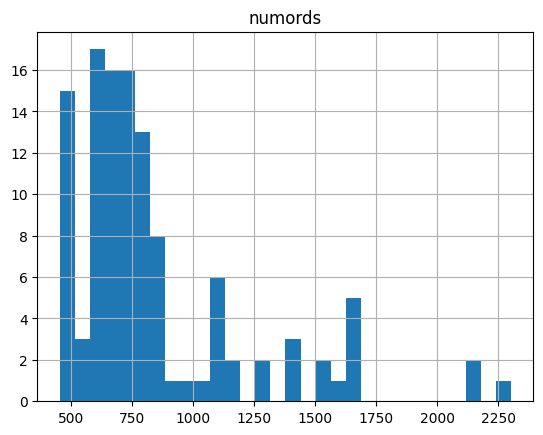

In [5]:
data[ ['numords','rfm1'] ].groupby('rfm1').count().hist(bins=30)

array([[<AxesSubplot:title={'center':'numords'}>]], dtype=object)

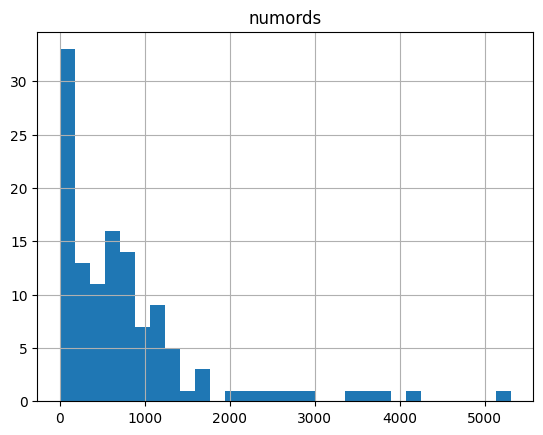

In [6]:
data[ ['numords','rfm2'] ].groupby('rfm2').count().hist(bins=30)

<ul>
<li>Only independent approach allows comparisons across groups
e.g. 113 customer spent more than 224 customer. Cannot make such statement in sequential approach. Why: can only compare within RxF bin across M
<li>Sequential approach has advantage of looking at more homogeneous groups b/c M value computed within R and F groups 
<li>Sequential approach implicitly weights R > F > M
<li>From targeting perspective, often little difference in performance (in terms of return on marketing)
<li>Sequential approach has advantage when forecasting profit and ROI
</ul>

<h1>Asssesing models' perfomance</h1>

In [7]:
data['buyer_dummy']=(data['buyer']=='yes')*1
data['rec_dec']=mba263.ntile(data['last'],10)

In [8]:
data[ ['buyer_dummy','rec_dec'] ].groupby('rec_dec').describe()

buyer_dummy                                             
              count      mean       std  min  25%  50%  75%  max
rec_dec                                                         
0            9734.0  0.045305  0.207983  0.0  0.0  0.0  0.0  1.0
1            9714.0  0.034589  0.182746  0.0  0.0  0.0  0.0  1.0
2            9569.0  0.030829  0.172862  0.0  0.0  0.0  0.0  1.0
3            9653.0  0.027971  0.164897  0.0  0.0  0.0  0.0  1.0
4            9886.0  0.020534  0.141826  0.0  0.0  0.0  0.0  1.0
5            9495.0  0.020221  0.140763  0.0  0.0  0.0  0.0  1.0
6            9572.0  0.017969  0.132846  0.0  0.0  0.0  0.0  1.0
7            9741.0  0.016733  0.128277  0.0  0.0  0.0  0.0  1.0
8            9602.0  0.017809  0.132263  0.0  0.0  0.0  0.0  1.0
9            9585.0  0.013354  0.114792  0.0  0.0  0.0  0.0  1.0

We're adding a new column that is the average purchase rate by rfm1 cell

In [9]:
data['response1']=mba263.get_means(data['buyer_dummy'],data['rfm1'])
data

,numords,totdol,last,buyer,dollars,rfm1,rfm2,buyer_dummy,rec_dec,response1
0,7,493,207,no,0,222,211,0,2,0.029308
1,4,423,625,no,0,421,422,0,6,0.028832
2,4,246,28,no,0,134,122,0,0,0.043630
3,3,271,778,no,0,523,532,0,8,0.018349
4,2,148,396,no,0,343,343,0,4,0.018158
...,...,...,...,...,...,...,...,...,...,...
96546,8,440,30,no,0,124,112,0,0,0.040373
96547,2,228,375,yes,40,342,343,1,4,0.018253
96548,1,280,932,yes,200,551,552,1,9,0.007177
96549,1,74,639,no,0,453,455,0,7,0.011770


In [10]:
data['rfm_dec']=mba263.ntile(data['response1'],10)

In [11]:
data[ ['buyer_dummy','rfm_dec'] ].groupby('rfm_dec').describe()

buyer_dummy                                             
              count      mean       std  min  25%  50%  75%  max
rfm_dec                                                         
0            9781.0  0.009406  0.096532  0.0  0.0  0.0  0.0  1.0
1            9859.0  0.012780  0.112331  0.0  0.0  0.0  0.0  1.0
2            9637.0  0.014424  0.119235  0.0  0.0  0.0  0.0  1.0
3            9899.0  0.016466  0.127267  0.0  0.0  0.0  0.0  1.0
4            9471.0  0.019005  0.136551  0.0  0.0  0.0  0.0  1.0
5            9407.0  0.021792  0.146012  0.0  0.0  0.0  0.0  1.0
6            9980.0  0.025852  0.158701  0.0  0.0  0.0  0.0  1.0
7            9333.0  0.029144  0.168219  0.0  0.0  0.0  0.0  1.0
8           10056.0  0.039181  0.194034  0.0  0.0  0.0  0.0  1.0
9            9128.0  0.059378  0.236343  0.0  0.0  0.0  0.0  1.0

You can use this table to compute lift and gain in excel. Alternatively, mba263 module has lift and gain calculation built in.

Lift takes outcome variable (here, buyer_dummy) as first argument and predicted response (response1) as second argument. Third argument tells us number of bins (default is 10)

In [12]:
mba263.lift(data['buyer_dummy'],data['response1'])

array([241.79586931, 198.68354727, 172.49969078, 155.07161343,
       142.04628944, 131.37385456, 121.90946843, 113.99368524,
       106.95471874, 100.        ])

Lift returns 10 'lift' numbers, in descending order by cell. How do we interpret?

The first number is for top 10% of customers by response probability: it tells us the % response improvement if we target just the top 10% (versus random/everyone), the second number is for targeting the top 20%, etc

We can also use a built-in function for gain - Percentage of total buyers we expect from targeting X% of customers - where the first number is 0%, second number is targeting 10%, etc

Result is between 0 and 1 - this is a CDF!

In [13]:
mba263.gain(data['buyer_dummy'],data['response1'])

array([0.        , 0.22859553, 0.39477014, 0.50948967, 0.61830451,
       0.70476592, 0.78068326, 0.84943062, 0.90805567, 0.96119781,
       1.        ])

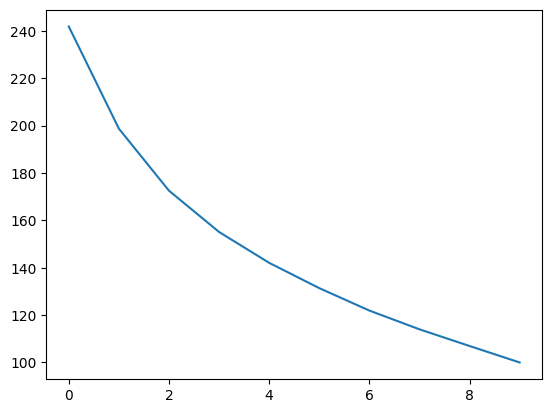

In [14]:
plt.plot(mba263.lift(data['buyer_dummy'],data['response1']))

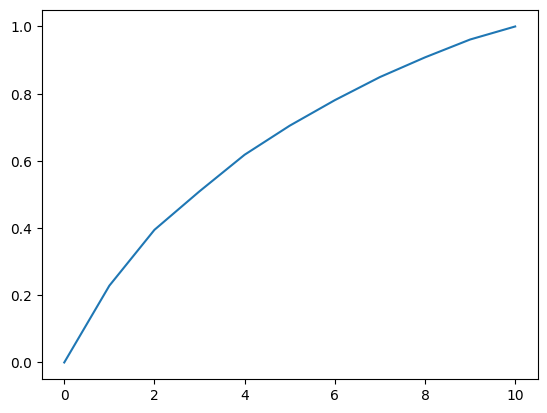

In [15]:
plt.plot(mba263.gain(data['buyer_dummy'],data['response1']))